In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/COMP309Project/traindata',
                                                 target_size = (300, 300),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3527 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/COMP309Project/testdata',
                                               target_size = (300, 300),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 450 images belonging to 3 classes.


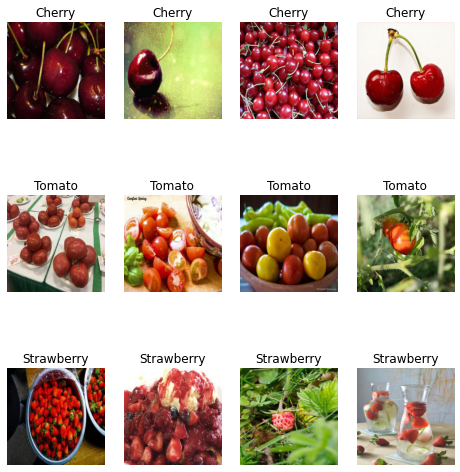

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2
#Ideas for EDA and code ^
#Directories are also for my own personal google drive

train_dir = '/content/drive/MyDrive/COMP309Project/traindata' # image folder

num = 4

#------------------Display 4 random images from each class ------------------

# get the list of jpegs from sub image class folders
cherry_imgs = [fn for fn in os.listdir(f'{train_dir}/cherry') if fn.endswith('.jpg')]
tomato_imgs = [fn for fn in os.listdir(f'{train_dir}/tomato') if fn.endswith('.jpg')]
strawberry_imgs = [fn for fn in os.listdir(f'{train_dir}/strawberry') if fn.endswith('.jpg')]

np.random.seed(0)
# randomly select 4 of each
select_ch = np.random.choice(cherry_imgs, num, replace = False)
select_to = np.random.choice(tomato_imgs, num, replace = False)
select_st = np.random.choice(strawberry_imgs, num, replace = False)


#plot
fig = plt.figure(figsize = (8,9))
for i in range(3*num):
    if i < num:
        fp = f'{train_dir}/cherry/{select_ch[i]}'
        label = 'Cherry'
    elif i < 2*num:
        fp = f'{train_dir}/tomato/{select_to[i-num]}'
        label = 'Tomato'
    else:
        fp = f'{train_dir}/strawberry/{select_st[i-(2*num)]}'
        label = 'Strawberry'

    ax = fig.add_subplot(3, num, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (300,300), color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:
# making n X m matrix
#Turns our image to np array - also from link above
def img2np(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
cherry_images = img2np(f'{train_dir}/cherry/', cherry_imgs)
tomato_images = img2np(f'{train_dir}/tomato/', tomato_imgs)
strawberry_images = img2np(f'{train_dir}/strawberry/', strawberry_imgs)



In [ ]:
from sklearn.decomposition import PCA
from math import ceil

#Compute PCA on images to get core images
#Based on code from link above
def eigenimages(full_mat, title, n_comp = 0.7, size = (300, 300)):
    
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (300, 300)):
    
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    




Cherry
Tomato
Strawberry


Number of PC:  23


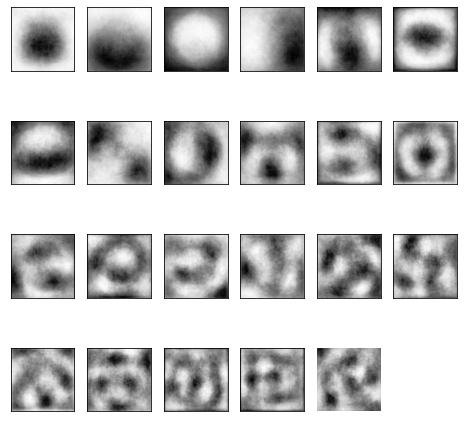

Number of PC:  29


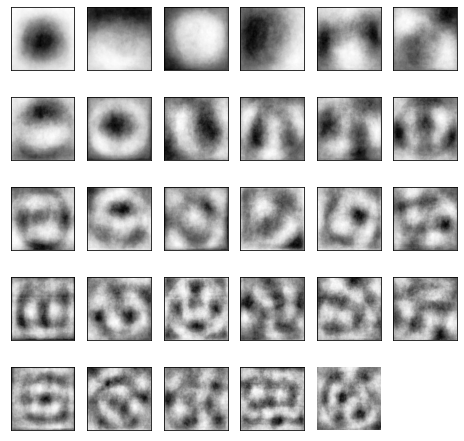

Number of PC:  19


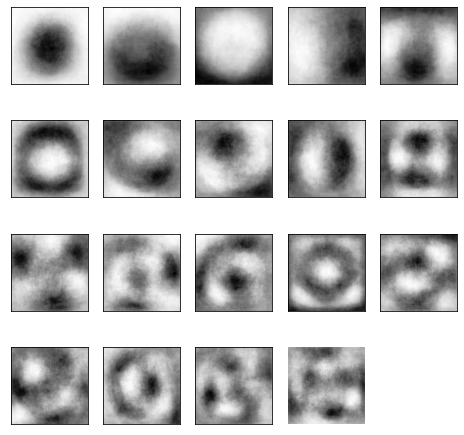

In [ ]:
plot_pca(eigenimages(cherry_images, 'Cherry'))
plot_pca(eigenimages(tomato_images, 'Tomato'))
plot_pca(eigenimages(strawberry_images, 'Strawberry'))

In [ ]:
# making n X m matrix
#Same as above but keeps each instance as a 3d array 
#This way we can count up the amount of red, green and blue for each image
def img2np2(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    i = 0
    full_mat = np.empty(shape=(1200, 300, 300, 3))
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'rgb')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
      
        if(i == 5):
          print(img_ts.shape)
          print((full_mat.shape))
          print(full_mat[3].shape)
        try:
           full_mat[i] = img_ts
           i = i + 1
        except UnboundLocalError: 
           
            full_mat[0] = img_ts
    return full_mat

# run it on our folders
print("start")
cherryArr = img2np2(f'{train_dir}/cherry/', cherry_imgs)
print('Done')
tomatoArr = img2np2(f'{train_dir}/tomato/', tomato_imgs)
print('Done')
strawberryArr = img2np2(f'{train_dir}/strawberry/', strawberry_imgs)

start
(300, 300, 3)
(1200, 300, 300, 3)
(300, 300, 3)
Done
(300, 300, 3)
(1200, 300, 300, 3)
(300, 300, 3)
Done
(300, 300, 3)
(1200, 300, 300, 3)
(300, 300, 3)


In [ ]:
#Getting average colour of each pixel for each class

def getAverage(number):
  total = 0.0
  total = number / (1200.0)
  total = total / 300.0
  total = total / 300.0
  return total

def averageColors(arr):
  red = 0.0
  green = 0.0
  blue = 0.0

  for i in range (1200):
    #if(i == 600):
      #print("Half")
    for x in range (300):
      for y in range (300):

          r = arr[i][x][y][0]
          g = arr[i][x][y][1]
          b = arr[i][x][y][2]
          red += r
          green += g
          blue += b
  
  print(getAverage(red))
  print(getAverage(green))
  print(getAverage(blue))




print("Cherry")
averageColors(cherryArr)

print("Tomato")
averageColors(tomatoArr)

print("Strawberry")
averageColors(strawberryArr)


Cherry
136.31965587037038
103.03100733333333
87.98159919444446
Tomato
130.7886484814815
96.84484871296297
72.21409053703704
Strawberry
140.0280816296296
105.38680447222222
90.83013546296296
